In [139]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

In [140]:
RUN = "nresults_full_3H_ws"
PREFIX = "/mnt/c/Users/scl38887/Documents/git/aldehyde/"
INPUT = PREFIX + "results/" + RUN + "/integrated_comp/stats.csv"
OUTPUT = PREFIX + "results/" + RUN + "/graphics/pricecuts/"

In [141]:
stats = pd.read_csv(INPUT, index_col=0)

In [142]:
stats.head()

,opts,cost,lcoh,lcoh_system,lcoh_notw_export,lcoh_notw_noexport,lcoh_notw_mixed,lcoe_notw,lcoh_w_export,lcoh_w_noexport,...,lcoe_w_electrolysis,lcoe_w_no_electrolysis,H2_GWh,Battery_GWh,H2export_GWh,ratio_H2_Battery,curtailmentrate_solar,curtailmentrate_wind,el_base_demand,cf_electrolysis
h2export,,,,,,,,,,,,,,,,,,,,,
0,Co2L2.0,5.053459e+09,NaN,NaN,0.00,68.63,67.20,37.83,0.00,70.50,...,37.68,38.23,0.242997,0.001088,0.0,223.334580,0.066190,0.006238,55.791023,0.93
20,Co2L2.0,6.888704e+09,NaN,91.762243,79.49,79.24,79.24,45.10,79.49,78.89,...,44.02,43.97,1.593787,0.006417,0.0,248.352934,0.070397,0.814314,55.791023,0.92
40,Co2L2.0,9.146691e+09,NaN,102.330795,81.81,81.28,81.29,46.59,81.81,80.75,...,43.40,43.17,9.496227,0.015361,0.0,618.188434,0.107856,1.129293,55.791023,0.80
60,Co2L2.0,1.144402e+10,NaN,106.509333,80.85,80.27,80.28,45.87,80.85,79.58,...,41.18,41.43,20.710134,0.010058,0.0,2059.139306,0.134641,1.133841,55.791023,0.74
80,Co2L2.0,1.375622e+10,NaN,108.784507,79.65,79.11,79.12,45.24,79.65,78.34,...,39.73,39.81,31.131783,0.001823,0.0,17078.453120,0.099907,1.108398,55.791023,0.72


In [143]:
def get_data(export):
    lcoe_w_electrolysis = stats[stats.index == export].lcoe_w_electrolysis
    lcoe_w_no_electrolysis = stats[stats.index == export].lcoe_w_no_electrolysis
    lcoe_w = stats[stats.index == export].lcoe_w
    return lcoe_w_electrolysis, lcoe_w_no_electrolysis, lcoe_w 

In [144]:
opts = stats[stats.index == 40].opts.str[4:]
opts = np.unique(
        opts.fillna(100).astype(float)
    )  # TODO improve the fillna value
opts_reverse = 1 - opts
opts_reverse[opts_reverse < 0] = 0
opts = opts_reverse[::-1] * 100

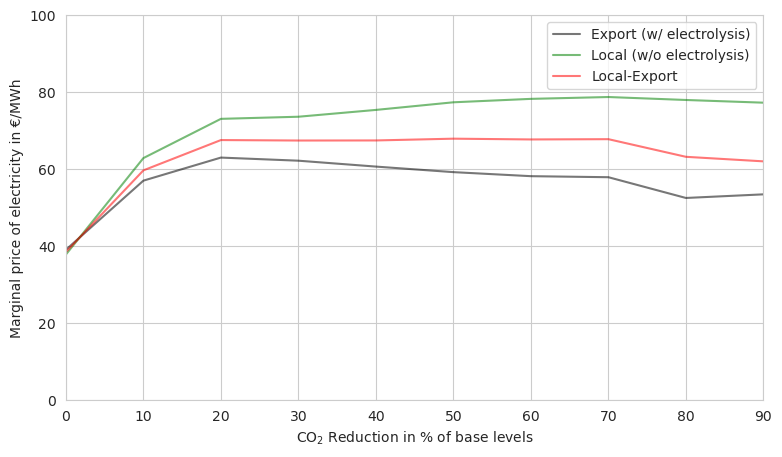

In [150]:
# Plot the lcoe_w_electrolysis lcoe_w_no_electrolysis along the stats["opts"]


fig, ax = plt.subplots(figsize=(6, 3))

for export in [100]: # [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]:
    lcoe_w_electrolysis, lcoe_w_no_electrolysis, lcoe_w = get_data(export)
    ax.plot(opts, lcoe_w_electrolysis, label="Export (w/ electrolysis)", color = "black", alpha = (export/300)+0.2)
    ax.plot(opts, lcoe_w_no_electrolysis, label="Local (w/o electrolysis)", color = "green", alpha = (export/300)+0.2)
    ax.plot(opts, lcoe_w, label="Local-Export", color = "red", alpha = (export/300)+0.2)
    ax.set_label("Export in % of base levels")

ax.set_xlabel("CO$_2$ Reduction in % of base levels")
ax.set_ylabel("Marginal price of electricity in €/MWh")
ax.set_xticks(opts)
ax.set_ylim(0, 100)
ax.set_xlim(0, 90)

ax.legend()

#ax.legend()
if not os.path.isdir(OUTPUT):
    os.makedirs(OUTPUT)
    print("Created directory " + OUTPUT)
# plt.savefig(OUTPUT + "electricity" + str(export) + ".pdf", bbox_inches="tight")
plt.show()

Probability experiments

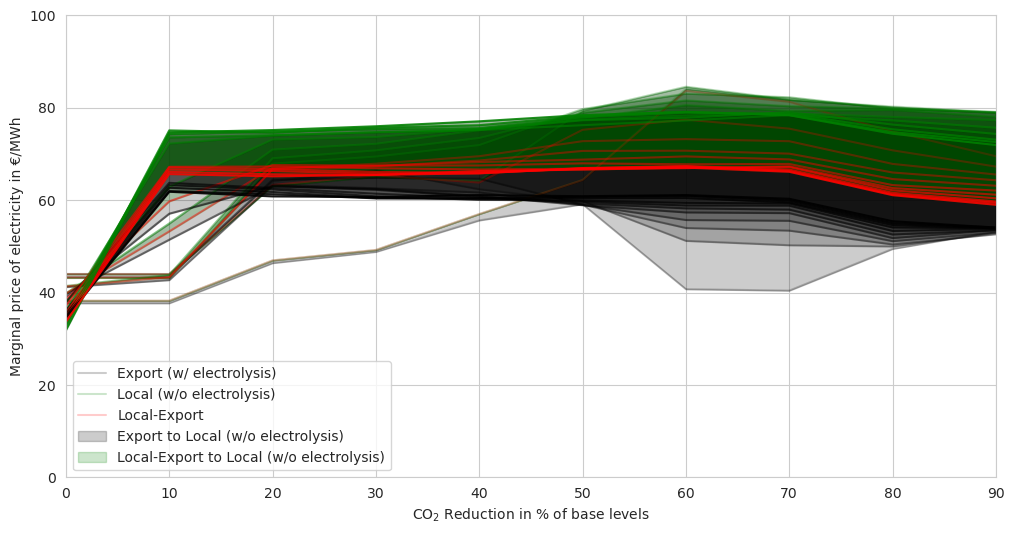

In [146]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Your existing code to get_data and other settings

fig, ax = plt.subplots(figsize=(12, 6))

exports = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

for i, export in enumerate(exports):
    lcoe_w_electrolysis, lcoe_w_no_electrolysis, lcoe_w = get_data(export)
    
    ax.plot(opts, lcoe_w_electrolysis, color="black", alpha=(export / 300) + 0.2)
    ax.plot(opts, lcoe_w_no_electrolysis, color="green", alpha=(export / 300) + 0.2)
    ax.plot(opts, lcoe_w, color="red", alpha=(export / 300) + 0.2)

    # Fill between curves at each x point
    ax.fill_between(opts, lcoe_w_electrolysis, lcoe_w_no_electrolysis, color="black", alpha=0.2)
    ax.fill_between(opts, lcoe_w_no_electrolysis, lcoe_w, color="green", alpha=0.2)

ax.set_xlabel("CO$_2$ Reduction in % of base levels")
ax.set_ylabel("Marginal price of electricity in €/MWh")
ax.set_xticks(opts)
ax.set_ylim(0, 100)
ax.set_xlim(0, 90)

# Add legend for the filled areas
ax.legend(["Export (w/ electrolysis)", "Local (w/o electrolysis)", "Local-Export", "Export to Local (w/o electrolysis)", "Local-Export to Local (w/o electrolysis)"])

if not os.path.isdir(OUTPUT):
    os.makedirs(OUTPUT)
    print("Created directory " + OUTPUT)
plt.savefig(OUTPUT + "hydrogen.pdf", bbox_inches="tight")
plt.show()


In [147]:
OUTPUT

'/mnt/c/Users/scl38887/Documents/git/aldehyde/results/nresults_full_3H_ws/graphics/pricecuts/'